In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
behavior_pat1 = pd.read_csv('./Behavioral_Data/subject_1_behave.csv')
behavior_pat1.head()

,Time,RT,Difficulty,isCorrect
0,1598.902,3635.104895,1,1
1,23814.206,2853.791475,2,1
2,39763.242,2182.772636,2,1
3,61978.531,3180.494785,2,0
4,79677.448,3880.589724,2,1


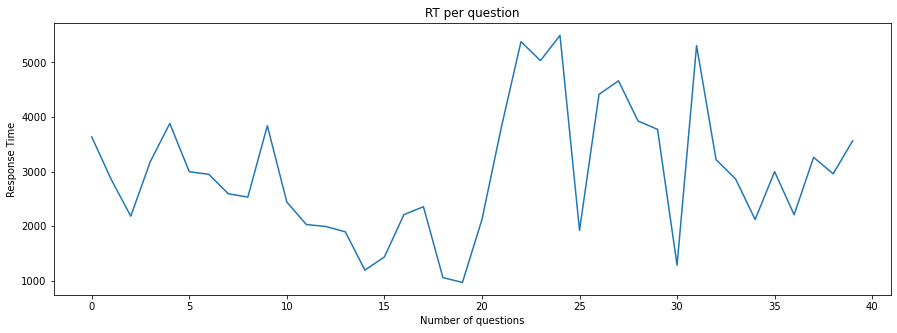

In [5]:
#lets try to visualize data for patient 1
plt.figure(figsize=(15,5))
plt.plot(np.arange(40),behavior_pat1['RT'])

plt.xlabel('Number of questions')
plt.ylabel('Response Time')
plt.title('RT per question')
plt.show()

Here we can see that the response time for question 15-20 is very less and the response time for questions 20-25 is high. We should check the dificulty level of questions between this timeline.

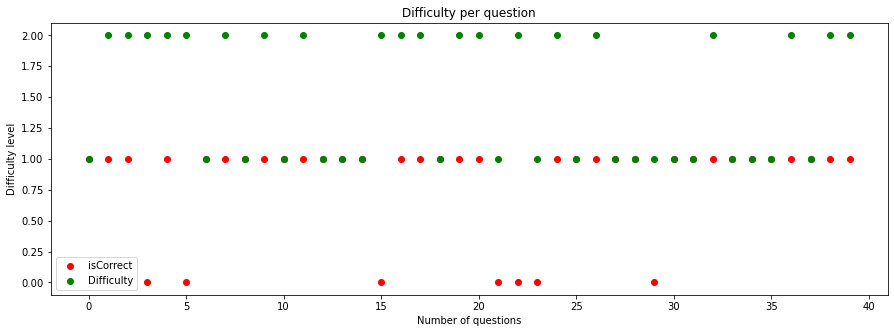

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(np.arange(40),behavior_pat1['isCorrect'], color='red')
plt.scatter(np.arange(40),behavior_pat1['Difficulty'], color='green')
plt.legend(['isCorrect', 'Difficulty'])
plt.xlabel('Number of questions')
plt.ylabel('Difficulty level')
plt.title('Difficulty per question')
plt.show()

Here we can see for questions 20-25 he got the maximum incorrect reponses even if the difficulty level was less and more time was taken

In [7]:
pupil_sub1 = pd.read_csv('./Pupil_data/subject_1_behave.csv')
pupil_sub1.head()

,Time,Pupil Diameter
0,4,4.431627
1,8,4.431849
2,12,4.432121
3,16,4.432451
4,20,4.432846


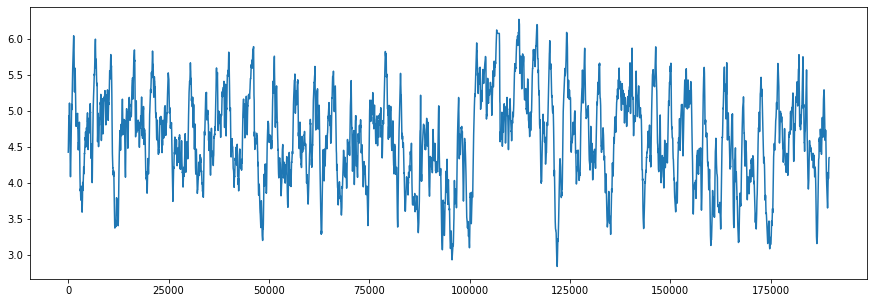

In [8]:

plt.figure(figsize=(15,5))
plt.plot(pupil_sub1['Pupil Diameter'])


In [9]:
pupil_sub1.describe()

,Time,Pupil Diameter
count,189518.000000,189518.000000
mean,379038.000000,4.624206
std,218837.113982,0.629241
min,4.000000,2.844679
25%,189521.000000,4.195024
50%,379038.000000,4.642508
75%,568555.000000,5.075196
max,758072.000000,6.275692


In [10]:
#find total na rows in all files
merged_data = pd.read_csv('merged_behavior.csv')

In [11]:
#checking if we have any missing value

merged_data.isnull().sum()

Time           0
RT            72
Difficulty     0
isCorrect      0
dtype: int64

In [12]:
merged_data = merged_data.dropna()

In [13]:
#Shape of dataset

print ('No. of Records :', merged_data.shape[0], '\nNo. of Features : ', merged_data.shape[1])

No. of Records : 2008 
No. of Features :  4


In [14]:
#find correlation between difficulty level and 
merged_data.iloc[:,1:].corr()

,RT,Difficulty,isCorrect
RT,1.000000,0.255205,-0.132006
Difficulty,0.255205,1.000000,-0.085546
isCorrect,-0.132006,-0.085546,1.000000


Here we can see that response time and difficulty has a positive correlation, which says that if difficulty is more pupil takes more time to reply
Also Difficulty and isCorrect has negative correlation, which says if the question is more difficult then value isCorrect is less

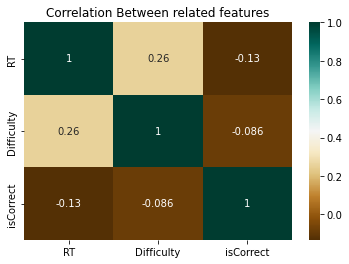

In [15]:
sns.heatmap(merged_data.iloc[:,1:].corr(), annot=True, cmap='BrBG')
plt.title('Correlation Between related features')
plt.show()

In [16]:
categorical_features = ['Difficulty','isCorrect']
for feature in categorical_features:
    print(feature,':')
    print(merged_data[feature].value_counts())
    print("-----------------")

Difficulty :
1    1018
2     990
Name: Difficulty, dtype: int64
-----------------
isCorrect :
1    1588
0     420
Name: isCorrect, dtype: int64
-----------------


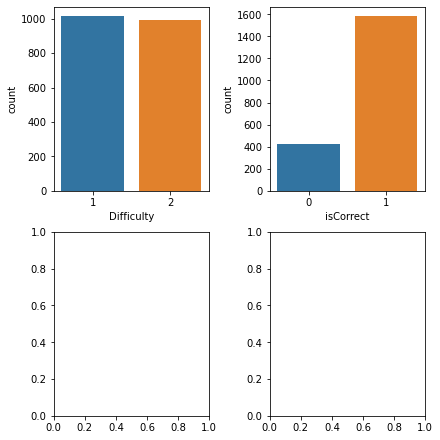

In [17]:
num_plots = 2
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(3*total_cols, 3*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=merged_data, ax=axs[row][pos])
    

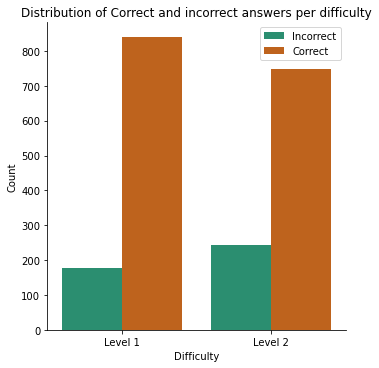

In [18]:
#CHD by Gender Viz.
sns.catplot(x='Difficulty', hue='isCorrect', data=merged_data, kind='count', palette='Dark2', legend=False)
plt.xlabel('Difficulty')
plt.xticks(ticks=[0,1], labels=['Level 1', 'Level 2'])
plt.ylabel('Count')
plt.legend(['Incorrect', 'Correct'])
plt.title('Distribution of Correct and incorrect answers per difficulty')
plt.show()

In [19]:
#analyzing pupil data 
merged_pupil_data = pd.read_csv('merged_pupil.csv')

In [20]:
merged_pupil_data.describe()

,Time,Pupil Diameter
count,9.849432e+06,9.849432e+06
mean,3.788264e+05,4.400855e+00
std,2.187145e+05,9.137780e-01
min,4.000000e+00,1.907024e+00
25%,1.894160e+05,3.742878e+00
50%,3.788280e+05,4.310915e+00
75%,5.682400e+05,4.947853e+00
max,7.583840e+05,7.919553e+00


In [21]:
#checking if we have any missing value

merged_pupil_data.isnull().sum()

Time              0
Pupil Diameter    0
dtype: int64

In [22]:
merged_pupil_data['Pupil Diameter'].max()

7.919553

In [23]:
merged_pupil_data['Pupil Diameter'].min()

1.907024

In [24]:
countup = 0
countdown = 0
for i in merged_pupil_data['Pupil Diameter']:
    if(i>4.4):
        countup +=1
    else:
        countdown +=1
print(countup, countdown)
    

4534581 5314851


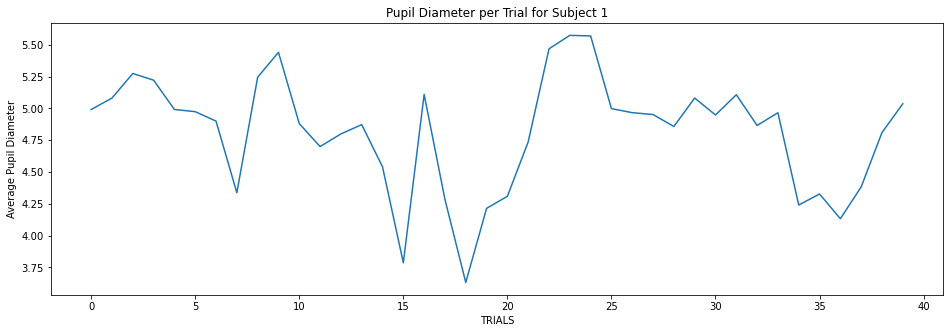

In [25]:
pupils_per_trial =[]
pupils_in_time = []

per_trial_mean = []

plt.figure(figsize=(16,5))

t_pupil_d = pd.read_csv('./Pupil_Data/subject_1_behave.csv')
t_behave_d = pd.read_csv('./Behavioral_Data/subject_1_behave.csv')
    
for j in range(len(t_behave_d)):
    start_time, end_time = t_behave_d['Time'][j] , (t_behave_d['Time'][j] + t_behave_d['RT'][j])
    pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
    per_trial_mean.append(np.mean(np.array(pupils_per_trial.iloc[:, 1])))

plt.plot(np.arange(len(t_behave_d)), per_trial_mean)
plt.ylabel('Average Pupil Diameter')
plt.xlabel('TRIALS')
plt.title('Pupil Diameter per Trial for Subject 1')
plt.show()

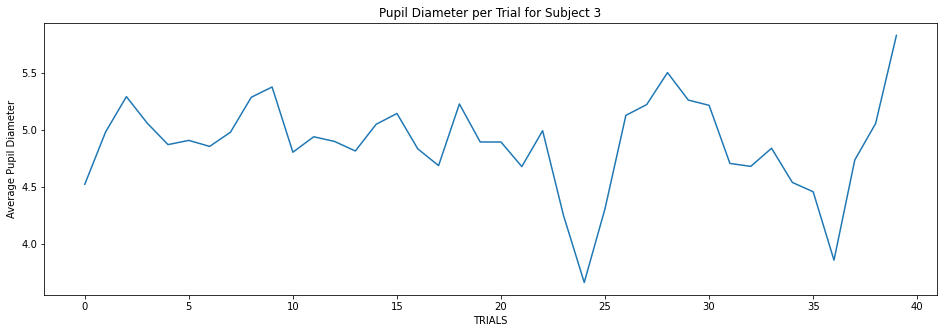

In [26]:
pupils_per_trial =[]
pupils_in_time = []

per_trial_mean = []

plt.figure(figsize=(16,5))

t_pupil_d = pd.read_csv('./Pupil_Data/subject_3_behave.csv')
t_behave_d = pd.read_csv('./Behavioral_Data/subject_3_behave.csv')
    
for j in range(len(t_behave_d)):
    start_time, end_time = t_behave_d['Time'][j] , (t_behave_d['Time'][j] + t_behave_d['RT'][j])
    pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
    per_trial_mean.append(np.mean(np.array(pupils_per_trial.iloc[:, 1])))

plt.plot(np.arange(len(t_behave_d)), per_trial_mean)
plt.ylabel('Average Pupil Diameter')
plt.xlabel('TRIALS')
plt.title('Pupil Diameter per Trial for Subject 3')
plt.show()

In [27]:
len(t_behave_d)

40

In [36]:

pupils_per_trial =[]
pupils_in_time = []



for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    for j in range(len(t_behave_d)):
        start_time, end_time = t_behave_d['Time'][j] , (t_behave_d['Time'][j] + t_behave_d['RT'][j])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
pupils_in_time = np.array(pupils_in_time)
print(pupils_in_time.shape)       
            

(2040,)


C:\Users\bhand\AppData\Local\Temp\ipykernel_14108\1740730235.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


In [29]:
pupils_in_time.resize(2040,1)

In [30]:
pupils_in_time

array([[array([4.767118, 4.765834, 4.764353, 4.762624, 4.760597, 4.758199,
               4.755406, 4.752198, 4.748518, 4.74434 , 4.739635, 4.734404,
               4.728661, 4.722405, 4.715655, 4.708433, 4.700788, 4.692763,
               4.684406, 4.675774, 4.666927, 4.657927, 4.648829, 4.639693,
               4.630561, 4.621486, 4.612509, 4.603664, 4.594972, 4.586455,
               4.578127, 4.569995, 4.562061, 4.554323, 4.546772, 4.539402,
               4.532213, 4.525187, 4.518301, 4.511546, 4.504913, 4.498393,
               4.491978, 4.485665, 4.479447, 4.47331 , 4.46729 , 4.461341,
               4.45544 , 4.449632, 4.443917, 4.438298, 4.432777, 4.427378,
               4.42208 , 4.416876, 4.411789, 4.406821, 4.401981, 4.397253,
               4.392627, 4.388113, 4.383708, 4.379408, 4.375195, 4.371064,
               4.36701 , 4.363026, 4.3591  , 4.355228, 4.351404, 4.347622,
               4.343887, 4.340188, 4.336521, 4.332888, 4.329293, 4.325728,
               4.322196, 

In [31]:
pupils_in_time[2,0][0]

4.877872

In [32]:
averages_pupil_diameter = []
tempsum = 0
for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i,0][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/2040)
    tempsum = 0

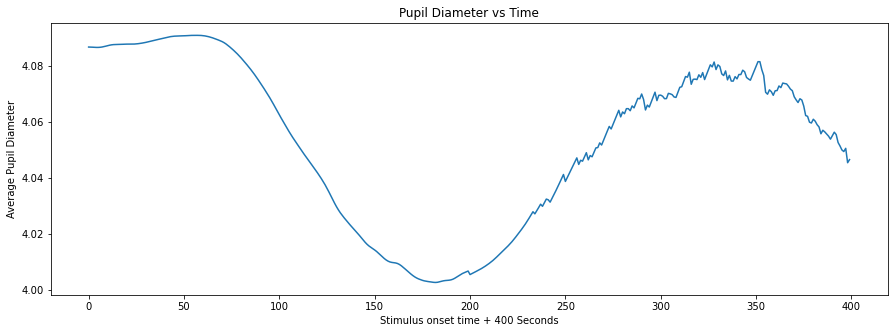

In [33]:

plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter)
plt.ylabel('Average Pupil Diameter')
plt.xlabel('Stimulus onset time + 400 Seconds')
plt.title('Pupil Diameter vs Time')
plt.show()

In [34]:
len(pupils_in_time[2])

1

In [ ]:
#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['Difficulty'] == 1)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                
plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter)


# plt.ylabel('Average Pupil Diameter')
# plt.xlabel('Stimulus onset time + 400 Seconds')
# plt.title('Pupil Diameter For Easy Questions vs Time')
# plt.show()                               

#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['Difficulty'] == 2)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                
plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter, color='green')
plt.legend(['Difficulty level 1', 'Difficulty level 2'])
plt.ylabel('Average Pupil Diameter')
plt.xlabel('Stimulus onset time + 400 Seconds')
plt.title('Pupil Diameter For difficulty levels vs Time')
plt.show()                               
            

In [219]:
t_behave_d = pd.read_csv('./Behavioral_Data/subject_1_behave.csv')
t_behave_d = t_behave_d.loc[(t_behave_d['Difficulty'] == 1)]
t_behave_d.iloc[0,1]

3635.104895

In [223]:
j= 0
start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
pupils_per_trial = pupils_per_trial.T

C:\Users\bhand\AppData\Local\Temp\ipykernel_22420\3056232241.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


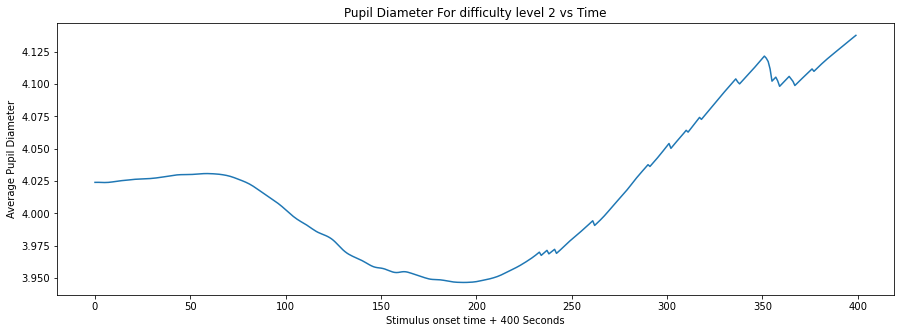

In [238]:
#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['Difficulty'] == 2)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                
plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter)
plt.ylabel('Average Pupil Diameter')
plt.xlabel('Stimulus onset time + 400 Seconds')
plt.title('Pupil Diameter For difficulty level 2 vs Time')
plt.show()                               
            

C:\Users\bhand\AppData\Local\Temp\ipykernel_22420\3887966991.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


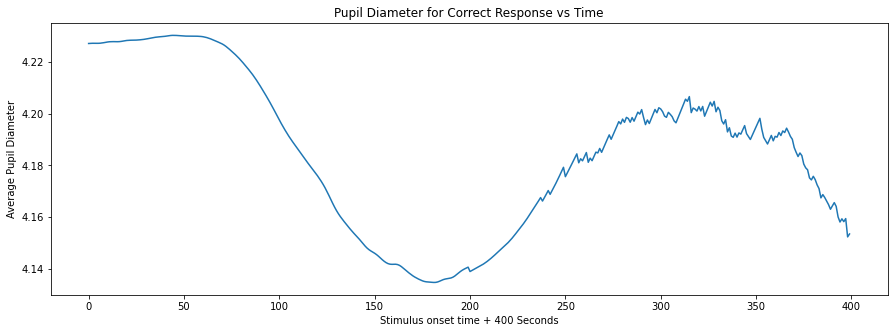

In [240]:
#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['isCorrect'] == 1)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                
plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter)
plt.ylabel('Average Pupil Diameter')
plt.xlabel('Stimulus onset time + 400 Seconds')
plt.title('Pupil Diameter for Correct Response vs Time')
plt.show()                               
            

C:\Users\bhand\AppData\Local\Temp\ipykernel_22420\301356660.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


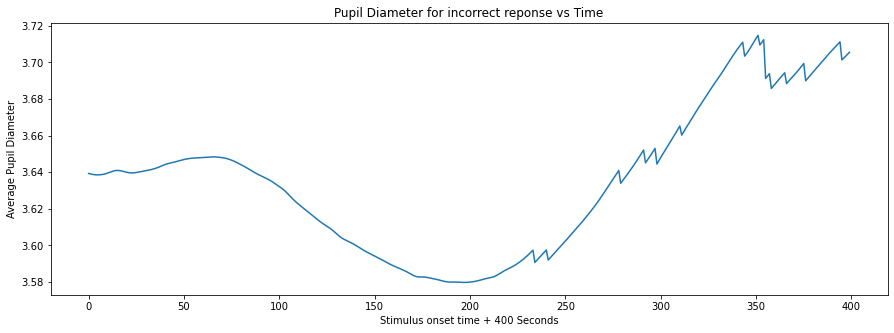

In [241]:
#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['isCorrect'] == 0)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                
plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter)
plt.ylabel('Average Pupil Diameter')
plt.xlabel('Stimulus onset time + 400 Seconds')
plt.title('Pupil Diameter for incorrect reponse vs Time')
plt.show()                               
            

C:\Users\bhand\AppData\Local\Temp\ipykernel_22420\3680441424.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)
C:\Users\bhand\AppData\Local\Temp\ipykernel_22420\3680441424.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


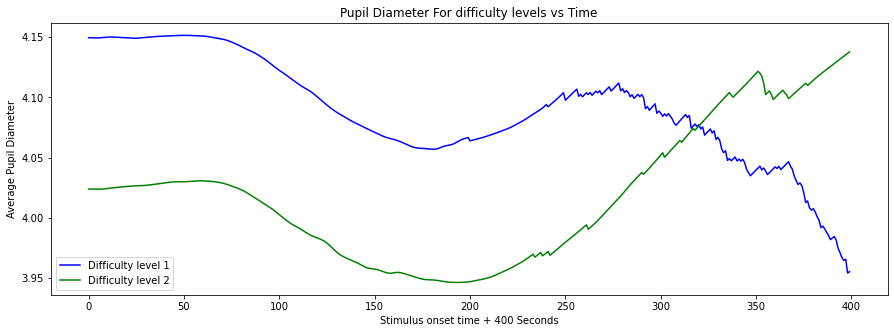

In [248]:
#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['Difficulty'] == 1)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter1 = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter1.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                


# plt.ylabel('Average Pupil Diameter')
# plt.xlabel('Stimulus onset time + 400 Seconds')
# plt.title('Pupil Diameter For Easy Questions vs Time')
# plt.show()                               

#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['Difficulty'] == 2)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                
plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter1, color='blue')
plt.plot(np.arange(400), averages_pupil_diameter, color='green')
plt.legend(['Difficulty level 1', 'Difficulty level 2'])
plt.ylabel('Average Pupil Diameter')
plt.xlabel('Stimulus onset time + 400 Seconds')
plt.title('Pupil Diameter For difficulty levels vs Time')
plt.show()                               
            

C:\Users\bhand\AppData\Local\Temp\ipykernel_22420\3579829113.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)
C:\Users\bhand\AppData\Local\Temp\ipykernel_22420\3579829113.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


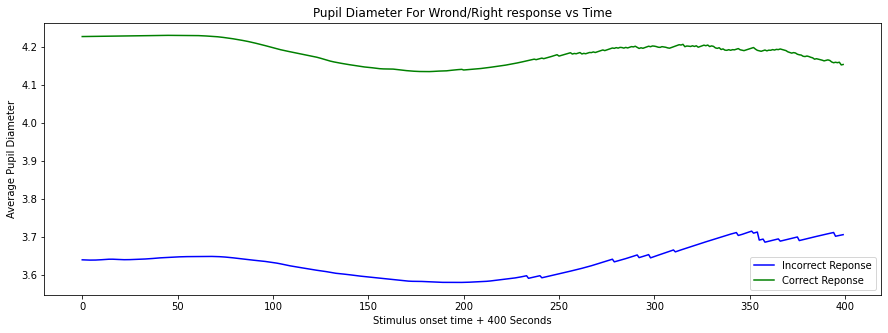

In [249]:
#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['isCorrect'] == 0)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter1 = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter1.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                


# plt.ylabel('Average Pupil Diameter')
# plt.xlabel('Stimulus onset time + 400 Seconds')
# plt.title('Pupil Diameter For Easy Questions vs Time')
# plt.show()                               

#finding the average pupil sizes for difficult responses

pupils_per_trial =[]
pupils_in_time = []

for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    t_behave_d = t_behave_d.loc[(t_behave_d['isCorrect'] == 1)]
    
    for j in range(len(t_behave_d)):
        start_time, end_time = (t_behave_d.iloc[j,0]) , (t_behave_d.iloc[j,0] + t_behave_d.iloc[j,1])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
        

pupils_in_time = np.array(pupils_in_time)
                                
averages_pupil_diameter = []
tempsum = 0

for j in range(400):
    for i in range(len(pupils_in_time)):
        try:
            tempsum += pupils_in_time[i][j]
        except:
            tempsum += 0
    averages_pupil_diameter.append(tempsum/len(pupils_in_time))
    tempsum = 0
                                
plt.figure(figsize=(15,5))
plt.plot(np.arange(400), averages_pupil_diameter1, color='blue')
plt.plot(np.arange(400), averages_pupil_diameter, color='green')
plt.legend(['Incorrect Reponse', 'Correct Reponse'])
plt.ylabel('Average Pupil Diameter')
plt.xlabel('Stimulus onset time + 400 Seconds')
plt.title('Pupil Diameter For Wrond/Right response vs Time')
plt.show()                               
            

# Part 3 of project

Our Arsenal - 

1) we have pupil responses per trial
2) We know the correct and incorrect response per trial
3) we know the dificulty level
4) We can create a dataframe from this variables to form a feature set

In [165]:

pupils_per_trial =[]
pupils_in_time = []



for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    for j in range(len(t_behave_d)):
        start_time, end_time = t_behave_d['Time'][j] , (t_behave_d['Time'][j] + t_behave_d['RT'][j])
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
pupils_in_time = np.array(pupils_in_time)
print(pupils_in_time.shape)       
            

(2040,)


C:\Users\bhand\AppData\Local\Temp\ipykernel_14108\1740730235.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


In [166]:
columnList = []
c = 4
for i in range(400):
    columnList.append("+"+str(c)+"secs")
    c+=4
    

In [167]:
new_pupil = []
for x in pupils_in_time:
    new_pupil.append(list(x[:400]))


In [168]:
df = pd.DataFrame(data = new_pupil,
                  columns = columnList)

In [169]:
df.shape

(2040, 400)

In [170]:
df.head()

,+4secs,+8secs,+12secs,+16secs,+20secs,+24secs,+28secs,+32secs,+36secs,+40secs,...,+1564secs,+1568secs,+1572secs,+1576secs,+1580secs,+1584secs,+1588secs,+1592secs,+1596secs,+1600secs
0,4.767118,4.765834,4.764353,4.762624,4.760597,4.758199,4.755406,4.752198,4.748518,4.744340,...,4.880112,4.885473,4.890832,4.896189,4.901536,4.906866,4.912179,4.917468,4.922731,4.927964
1,4.009070,4.008819,4.008649,4.008562,4.008555,4.008627,4.008782,4.009022,4.009347,4.009761,...,5.237630,5.238817,5.240033,5.241280,5.242559,5.243875,5.245228,5.246620,5.248055,5.249534
2,4.877872,4.878925,4.880098,4.881392,4.882802,4.884329,4.885969,4.887722,4.889585,4.891555,...,5.562994,5.562619,5.562151,5.561593,5.560946,5.560215,5.559406,5.558521,5.557563,5.556532
3,4.957144,4.957078,4.957015,4.956957,4.956904,4.956858,4.956818,4.956784,4.956756,4.956732,...,5.343853,5.344826,5.345743,5.346605,5.347414,5.348173,5.348887,5.349560,5.350195,5.350798
4,4.218795,4.215972,4.213148,4.210330,4.207523,4.204736,4.201974,4.199248,4.196567,4.193939,...,5.000303,5.002269,5.004253,5.006255,5.008271,5.010301,5.012341,5.014390,5.016448,5.018513


In [171]:
df = df.sub(df.mean(axis=1), axis=0)

In [172]:
df.head()

,+4secs,+8secs,+12secs,+16secs,+20secs,+24secs,+28secs,+32secs,+36secs,+40secs,...,+1564secs,+1568secs,+1572secs,+1576secs,+1580secs,+1584secs,+1588secs,+1592secs,+1596secs,+1600secs
0,0.349645,0.348361,0.346880,0.345151,0.343124,0.340726,0.337933,0.334725,0.331045,0.326867,...,0.462639,0.468000,0.473359,0.478716,0.484063,0.489393,0.494706,0.499995,0.505258,0.510491
1,-0.723035,-0.723286,-0.723456,-0.723543,-0.723550,-0.723478,-0.723323,-0.723083,-0.722758,-0.722344,...,0.505525,0.506712,0.507928,0.509175,0.510454,0.511770,0.513123,0.514515,0.515950,0.517429
2,-0.321345,-0.320292,-0.319119,-0.317825,-0.316415,-0.314888,-0.313248,-0.311495,-0.309632,-0.307662,...,0.363777,0.363402,0.362934,0.362376,0.361729,0.360998,0.360189,0.359304,0.358346,0.357315
3,-0.086106,-0.086172,-0.086235,-0.086293,-0.086346,-0.086392,-0.086432,-0.086466,-0.086494,-0.086518,...,0.300603,0.301576,0.302493,0.303355,0.304164,0.304923,0.305637,0.306310,0.306945,0.307548
4,-0.268253,-0.271076,-0.273900,-0.276718,-0.279525,-0.282312,-0.285074,-0.287800,-0.290481,-0.293109,...,0.513255,0.515221,0.517205,0.519207,0.521223,0.523253,0.525293,0.527342,0.529400,0.531465


In [174]:
merge_behave_data = pd.read_csv('./Behavioral_Data/subject_1_behave.csv')
for i in range(2,52):
   
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    merge_behave_data = pd.concat([merge_behave_data, t_behave_d])

In [175]:
merge_behave_data.shape

(2040, 4)

In [176]:
merge_behave_data.head()

,Time,RT,Difficulty,isCorrect
0,1598.902,3635.104895,1,1
1,23814.206,2853.791475,2,1
2,39763.242,2182.772636,2,1
3,61978.531,3180.494785,2,0
4,79677.448,3880.589724,2,1


In [177]:
df.head()

,+4secs,+8secs,+12secs,+16secs,+20secs,+24secs,+28secs,+32secs,+36secs,+40secs,...,+1564secs,+1568secs,+1572secs,+1576secs,+1580secs,+1584secs,+1588secs,+1592secs,+1596secs,+1600secs
0,0.349645,0.348361,0.346880,0.345151,0.343124,0.340726,0.337933,0.334725,0.331045,0.326867,...,0.462639,0.468000,0.473359,0.478716,0.484063,0.489393,0.494706,0.499995,0.505258,0.510491
1,-0.723035,-0.723286,-0.723456,-0.723543,-0.723550,-0.723478,-0.723323,-0.723083,-0.722758,-0.722344,...,0.505525,0.506712,0.507928,0.509175,0.510454,0.511770,0.513123,0.514515,0.515950,0.517429
2,-0.321345,-0.320292,-0.319119,-0.317825,-0.316415,-0.314888,-0.313248,-0.311495,-0.309632,-0.307662,...,0.363777,0.363402,0.362934,0.362376,0.361729,0.360998,0.360189,0.359304,0.358346,0.357315
3,-0.086106,-0.086172,-0.086235,-0.086293,-0.086346,-0.086392,-0.086432,-0.086466,-0.086494,-0.086518,...,0.300603,0.301576,0.302493,0.303355,0.304164,0.304923,0.305637,0.306310,0.306945,0.307548
4,-0.268253,-0.271076,-0.273900,-0.276718,-0.279525,-0.282312,-0.285074,-0.287800,-0.290481,-0.293109,...,0.513255,0.515221,0.517205,0.519207,0.521223,0.523253,0.525293,0.527342,0.529400,0.531465


In [178]:
df['RT'] = list(merge_behave_data.iloc[:, 1])

In [179]:
df['Difficulty'] = list(merge_behave_data.iloc[:, 2])

In [180]:
df['isCorrect'] = list(merge_behave_data.iloc[:, 3])

In [181]:
df.head()

,+4secs,+8secs,+12secs,+16secs,+20secs,+24secs,+28secs,+32secs,+36secs,+40secs,...,+1576secs,+1580secs,+1584secs,+1588secs,+1592secs,+1596secs,+1600secs,RT,Difficulty,isCorrect
0,0.349645,0.348361,0.346880,0.345151,0.343124,0.340726,0.337933,0.334725,0.331045,0.326867,...,0.478716,0.484063,0.489393,0.494706,0.499995,0.505258,0.510491,3635.104895,1,1
1,-0.723035,-0.723286,-0.723456,-0.723543,-0.723550,-0.723478,-0.723323,-0.723083,-0.722758,-0.722344,...,0.509175,0.510454,0.511770,0.513123,0.514515,0.515950,0.517429,2853.791475,2,1
2,-0.321345,-0.320292,-0.319119,-0.317825,-0.316415,-0.314888,-0.313248,-0.311495,-0.309632,-0.307662,...,0.362376,0.361729,0.360998,0.360189,0.359304,0.358346,0.357315,2182.772636,2,1
3,-0.086106,-0.086172,-0.086235,-0.086293,-0.086346,-0.086392,-0.086432,-0.086466,-0.086494,-0.086518,...,0.303355,0.304164,0.304923,0.305637,0.306310,0.306945,0.307548,3180.494785,2,0
4,-0.268253,-0.271076,-0.273900,-0.276718,-0.279525,-0.282312,-0.285074,-0.287800,-0.290481,-0.293109,...,0.519207,0.521223,0.523253,0.525293,0.527342,0.529400,0.531465,3880.589724,2,1


In [182]:
#lets normalize the column of response time
df['RT'] = (df['RT'] - df['RT'].mean()) / df['RT'].std()    

In [183]:
df.isnull().sum()

+4secs         71
+8secs         71
+12secs        71
+16secs        71
+20secs        71
             ... 
+1596secs     188
+1600secs     188
RT             71
Difficulty      0
isCorrect       0
Length: 403, dtype: int64

In [184]:
df = df.dropna()

In [185]:
df.isnull().sum()

+4secs        0
+8secs        0
+12secs       0
+16secs       0
+20secs       0
             ..
+1596secs     0
+1600secs     0
RT            0
Difficulty    0
isCorrect     0
Length: 403, dtype: int64

We have now create our new dataframe which can be used for prediction purpose

In [186]:
df.describe()

,+4secs,+8secs,+12secs,+16secs,+20secs,+24secs,+28secs,+32secs,+36secs,+40secs,...,+1576secs,+1580secs,+1584secs,+1588secs,+1592secs,+1596secs,+1600secs,RT,Difficulty,isCorrect
count,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,...,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000
mean,-0.005505,-0.005537,-0.005592,-0.005654,-0.005701,-0.005717,-0.005690,-0.005618,-0.005505,-0.005368,...,0.194090,0.195417,0.196732,0.198026,0.199296,0.200541,0.201763,0.104210,1.512419,0.782937
std,0.238653,0.238427,0.238213,0.238017,0.237837,0.237656,0.237445,0.237170,0.236806,0.236356,...,0.227617,0.228352,0.229065,0.229754,0.230436,0.231129,0.231843,0.937849,0.499981,0.412357
min,-1.175220,-1.168183,-1.161876,-1.156112,-1.150681,-1.145421,-1.140212,-1.134915,-1.129522,-1.124180,...,-1.020116,-1.029844,-1.040633,-1.052200,-1.063750,-1.074402,-1.083801,-1.480330,1.000000,0.000000
25%,-0.142326,-0.141253,-0.140565,-0.139935,-0.141009,-0.140555,-0.140606,-0.139508,-0.139098,-0.139479,...,0.056794,0.058024,0.059299,0.060694,0.059956,0.061118,0.062018,-0.639490,1.000000,1.000000
50%,-0.020079,-0.019944,-0.019221,-0.018770,-0.019340,-0.019702,-0.018266,-0.018338,-0.017522,-0.017480,...,0.192777,0.193327,0.194212,0.195895,0.197128,0.198673,0.200379,0.010180,2.000000,1.000000
75%,0.115863,0.116408,0.115936,0.116609,0.116661,0.116529,0.115345,0.113104,0.113558,0.113860,...,0.334717,0.336058,0.337864,0.338016,0.340153,0.342250,0.343434,0.799915,2.000000,1.000000
max,1.508176,1.504198,1.500138,1.496312,1.492696,1.489203,1.485735,1.482356,1.479274,1.476666,...,1.138249,1.144498,1.150980,1.157665,1.164290,1.170496,1.175998,2.427597,2.000000,1.000000


In [187]:
df.shape

(1852, 403)

Now the data can be used for training in our model using ML algorithms

# Step 4

1) Data normalization was done above
2) Here we will split data into test and training
3) Use 2-3 ML models and compare their accuracy

In [206]:
#We will try to predict the Response time for each trial
X = df.iloc[:, :400]
y = df.iloc[:, 400]

In [217]:
y

0      -0.236297
1      -0.713964
2      -1.124201
3      -0.514229
4      -0.086217
          ...   
2035    2.167471
2036    1.731984
2037   -0.974451
2038    0.928372
2039    0.152914
Name: RT, Length: 1852, dtype: float64

In [218]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#Predicting the Test set results
y_pred = regressor.predict(X_test)



In [219]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 1.04
Mean squared error = 2.33
Median absolute error = 0.88
Explain variance score = -1.63
R2 score = -1.65


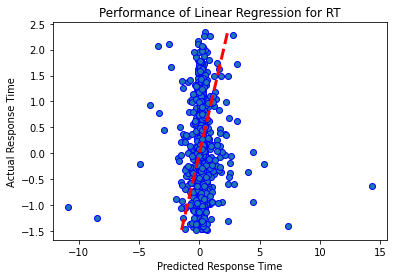

In [226]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted Response Time')
ax.set_ylabel('Actual Response Time')
plt.title('Performance of Linear Regression for RT')
plt.show()

Now we will try to predict the dificulty based on pupil response

In [261]:
#We will try to predict the difficulty for each trial
X = df.iloc[:, :401]
y = df.iloc[:, 401]

In [262]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#we already have the train and test data
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(random_state = 12, max_iter=2000).fit(X_train, y_train)

print("Training accuracy is ", log_regressor.score(X_train, y_train))
print("Testing accuracy is ", log_regressor.score(X_test, y_test))


y_pred = log_regressor.predict(X_test[0:50])

Training accuracy is  0.6045380875202593
Testing accuracy is  0.5825242718446602


In [266]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test[:50], y_pred, labels=[1,2])
print(cm)

[[13 15]
 [10 12]]


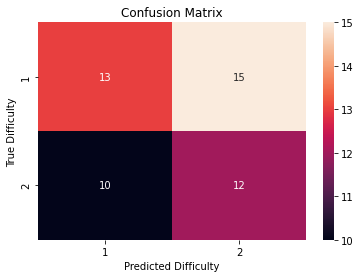

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Difficulty');ax.set_ylabel('True Difficulty'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '2']); ax.yaxis.set_ticklabels(['1', '2']);

Now we will try to predict the dificulty based on pupil response

In [268]:
#We will try to predict the correctness for each trial
X = df.iloc[:, :402]
y = df.iloc[:, 402]

In [269]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#we already have the train and test data
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(random_state = 12, max_iter=2000).fit(X_train, y_train)

print("Training accuracy is ", log_regressor.score(X_train, y_train))
print("Testing accuracy is ", log_regressor.score(X_test, y_test))


y_pred = log_regressor.predict(X_test[0:50])

Training accuracy is  0.779578606158833
Testing accuracy is  0.7831715210355987


# Step 4

Here we will try to find the peak pupil response, Then calculate the time taken to reach the peak response and try to predict the stimulus onset time based on it.


In [380]:
#first get the pupil responses

pupils_per_trial =[]
pupils_in_time = []
stimulus_onset_time = []


for i in range(1,52):
    t_pupil_d = pd.read_csv('./Pupil_Data/subject_'+str(i)+'_behave.csv')
    t_behave_d = pd.read_csv('./Behavioral_Data/subject_'+str(i)+'_behave.csv')
    
    for j in range(len(t_behave_d)):
        start_time, end_time = t_behave_d['Time'][j] , (t_behave_d['Time'][j] + t_behave_d['RT'][j])
        stimulus_onset_time.append(start_time)
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
pupils_in_time = np.array(pupils_in_time)
print(pupils_in_time.shape)       
            

(2040,)


C:\Users\bhand\AppData\Local\Temp\ipykernel_14108\2027815594.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


In [381]:
columnList = []
c = 4
for i in range(991):
    columnList.append(c)
    c+=4
    

In [382]:
new_pupil = []
for x in pupils_in_time:
    new_pupil.append(list(x[:991]))


In [383]:
df = pd.DataFrame(data = new_pupil,
                  columns = columnList)

In [384]:
df.head()

,4,8,12,16,20,24,28,32,36,40,...,3928,3932,3936,3940,3944,3948,3952,3956,3960,3964
0,4.767118,4.765834,4.764353,4.762624,4.760597,4.758199,4.755406,4.752198,4.748518,4.744340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.009070,4.008819,4.008649,4.008562,4.008555,4.008627,4.008782,4.009022,4.009347,4.009761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.877872,4.878925,4.880098,4.881392,4.882802,4.884329,4.885969,4.887722,4.889585,4.891555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.957144,4.957078,4.957015,4.956957,4.956904,4.956858,4.956818,4.956784,4.956756,4.956732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.218795,4.215972,4.213148,4.210330,4.207523,4.204736,4.201974,4.199248,4.196567,4.193939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
#Get the peak pupil responses
df.max(axis=1)

0       5.991895
1       5.815964
2       5.563529
3       5.691393
4       5.597188
          ...   
2035    6.932581
2036    6.994491
2037    6.438678
2038    6.726127
2039    6.690952
Length: 2040, dtype: float64

In [312]:
#get pupil latency to reach the peak value
PeakLatency = df.idxmax(axis=1)
 
print("Max values of row where the peak response was hit :")
print(PeakLatency)

Max values of row where the peak response was hit :
0       3636.0
1       2852.0
2       1552.0
3       3180.0
4       3880.0
         ...  
2035    3952.0
2036    3232.0
2037    1584.0
2038    3964.0
2039    3428.0
Length: 2040, dtype: float64


In [385]:
#create a dataframe based on peak latency and value and try to make above predictions
newData = pd.DataFrame(data = df.max(axis=1), columns=['Peak Pupil Response'])

In [386]:
newData['Peak_Latency'] = df.idxmax(axis=1)

In [387]:
newData.head()

,Peak Pupil Response,Peak_Latency
0,5.991895,3636.0
1,5.815964,2852.0
2,5.563529,1552.0
3,5.691393,3180.0
4,5.597188,3880.0


In [388]:
#get the stimulus onset time
print(len(stimulus_onset_time))

2040


In [389]:
newData['Stimulus_Onset_Time'] = stimulus_onset_time

In [390]:
newData.head()

,Peak Pupil Response,Peak_Latency,Stimulus_Onset_Time
0,5.991895,3636.0,1598.902
1,5.815964,2852.0,23814.206
2,5.563529,1552.0,39763.242
3,5.691393,3180.0,61978.531
4,5.597188,3880.0,79677.448


In [391]:
#the value in Time and Latency are too big compared to Pupil response, so we will scale all the columns 

from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(newData), columns=newData.columns)

df_std

#reference taken from sklearn standardScalar

,Peak Pupil Response,Peak_Latency,Stimulus_Onset_Time
0,1.287904,0.802677,-1.689094
1,1.092549,0.153094,-1.585567
2,0.812244,-0.924020,-1.511241
3,0.954225,0.424859,-1.407714
4,0.849619,1.004843,-1.325234
...,...,...,...
2035,2.332447,1.064499,1.335156
2036,2.401192,0.467943,1.436587
2037,1.784014,-0.897506,1.520931
2038,2.103199,1.074441,1.602557


In [392]:
df_std = df_std.dropna()

Lets try to check if there is any correlation between these features

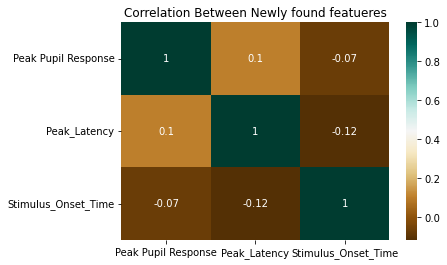

In [393]:
sns.heatmap(df_std.corr(), annot=True, cmap='BrBG')
plt.title('Correlation Between Newly found featueres')
plt.show()

## Here we will try to predict the stimulus onset time using this newly found features

In [341]:
X = df_std.iloc[:, :-1]
y = df_std.iloc[:, -1]

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#Predicting the Test set results
y_pred = regressor.predict(X_test)



In [342]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.86
Mean squared error = 1.0
Median absolute error = 0.85
Explain variance score = 0.01
R2 score = 0.01


In [346]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

reg.predict(X_test)

reg.score(X_test, y_test)

-0.025032925190935584

In [394]:
newData.head()

,Peak Pupil Response,Peak_Latency,Stimulus_Onset_Time
0,5.991895,3636.0,1598.902
1,5.815964,2852.0,23814.206
2,5.563529,1552.0,39763.242
3,5.691393,3180.0,61978.531
4,5.597188,3880.0,79677.448


In [349]:
new_data_step = 

,4,8,12,16,20,24,28,32,36,40,...,3928,3932,3936,3940,3944,3948,3952,3956,3960,3964
0,4.767118,4.765834,4.764353,4.762624,4.760597,4.758199,4.755406,4.752198,4.748518,4.744340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.009070,4.008819,4.008649,4.008562,4.008555,4.008627,4.008782,4.009022,4.009347,4.009761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.877872,4.878925,4.880098,4.881392,4.882802,4.884329,4.885969,4.887722,4.889585,4.891555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.957144,4.957078,4.957015,4.956957,4.956904,4.956858,4.956818,4.956784,4.956756,4.956732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.218795,4.215972,4.213148,4.210330,4.207523,4.204736,4.201974,4.199248,4.196567,4.193939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,5.704082,5.706102,5.708237,5.710493,5.712878,5.715401,5.718077,5.720916,5.723932,5.727139,...,6.930619,6.931268,6.931781,6.932168,6.932430,6.932567,6.932581,6.932477,6.932255,6.931922
2036,5.865199,5.865199,5.865199,5.865199,5.865199,5.865199,5.865199,5.865199,5.865199,5.865199,...,6.897968,6.898762,6.899558,6.900357,6.901157,6.901961,6.902768,6.903577,6.904391,6.905212
2037,5.748129,5.744103,5.740068,5.736034,5.732006,5.727990,5.723995,5.720029,5.716098,5.712207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038,5.458593,5.462968,5.467146,5.471083,5.474757,5.478120,5.481197,5.483980,5.486476,5.488680,...,6.672949,6.679440,6.685898,6.692265,6.698488,6.704522,6.710328,6.715877,6.721148,6.726127


In [350]:
#get pupil latency to reach the peak value
PeakLatency = df.idxmax(axis=1)
 
print("Max values of row where the peak response was hit :")
print(PeakLatency)

Max values of row where the peak response was hit :
0       3636.0
1       2852.0
2       1552.0
3       3180.0
4       3880.0
         ...  
2035    3952.0
2036    3232.0
2037    1584.0
2038    3964.0
2039    3428.0
Length: 2040, dtype: float64


In [395]:
#create a dataframe based on peak latency and value and try to make above predictions
newData = pd.DataFrame(data = df.max(axis=1), columns=['Peak Pupil Response'])

In [396]:
newData['Peak_Latency'] = df.idxmax(axis=1)

In [397]:
newData.head()

,Peak Pupil Response,Peak_Latency
0,5.991895,3636.0
1,5.815964,2852.0
2,5.563529,1552.0
3,5.691393,3180.0
4,5.597188,3880.0


In [398]:

newData['RT'] = list(merge_behave_data.iloc[:, 1])

newData['Difficulty'] = list(merge_behave_data.iloc[:, 2])



In [399]:
newData.head()

,Peak Pupil Response,Peak_Latency,RT,Difficulty
0,5.991895,3636.0,3635.104895,1
1,5.815964,2852.0,2853.791475,2
2,5.563529,1552.0,2182.772636,2
3,5.691393,3180.0,3180.494785,2
4,5.597188,3880.0,3880.589724,2


In [401]:
#the value in Time and Latency are too big compared to Pupil response, so we will scale all the columns 

from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df = pd.DataFrame(std_scaler.fit_transform(newData), columns=newData.columns)

df

#reference taken from sklearn standardScalar

,Peak Pupil Response,Peak_Latency,RT,Difficulty
0,1.287904,0.802677,-0.236357,-1.0
1,1.092549,0.153094,-0.714145,1.0
2,0.812244,-0.924020,-1.124486,1.0
3,0.954225,0.424859,-0.514360,1.0
4,0.849619,1.004843,-0.086239,1.0
...,...,...,...,...
2035,2.332447,1.064499,2.168022,1.0
2036,2.401192,0.467943,1.732424,1.0
2037,1.784014,-0.897506,-0.974698,-1.0
2038,2.103199,1.074441,0.928608,1.0


In [402]:
newData['isCorrect'] = list(merge_behave_data.iloc[:, 3])

In [416]:
newData.head()

,Peak Pupil Response,Peak_Latency,RT,Difficulty,isCorrect
0,5.991895,3636.0,3635.104895,1,1
1,5.815964,2852.0,2853.791475,2,1
2,5.563529,1552.0,2182.772636,2,1
3,5.691393,3180.0,3180.494785,2,0
4,5.597188,3880.0,3880.589724,2,1


In [415]:
newData.describe()

,Peak Pupil Response,Peak_Latency,RT,Difficulty,isCorrect
count,1969.000000,1969.000000,1969.000000,2040.000000,2040.000000
mean,4.832045,2667.226003,4021.613469,1.500000,0.761275
std,0.900800,1207.235164,1635.687459,0.500123,0.426409
min,3.037058,4.000000,797.361135,1.000000,0.000000
25%,4.197417,1944.000000,2733.876944,1.000000,1.000000
50%,4.813116,2996.000000,3894.249678,1.500000,1.000000
75%,5.343777,3684.000000,5258.509636,2.000000,1.000000
max,7.661647,3964.000000,7992.403507,2.000000,1.000000


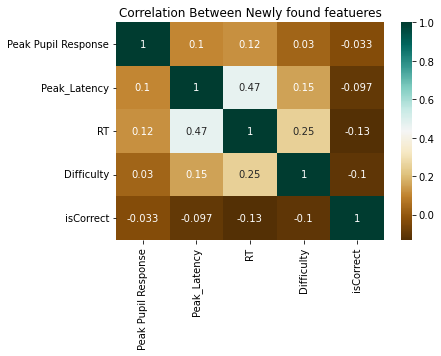

In [404]:
sns.heatmap(newData.corr(), annot=True, cmap='BrBG')
plt.title('Correlation Between Newly found featueres')
plt.show()

In [406]:
df = newData.dropna()

In [405]:
newData

,Peak Pupil Response,Peak_Latency,RT,Difficulty,isCorrect
0,5.991895,3636.0,3635.104895,1,1
1,5.815964,2852.0,2853.791475,2,1
2,5.563529,1552.0,2182.772636,2,1
3,5.691393,3180.0,3180.494785,2,0
4,5.597188,3880.0,3880.589724,2,1
...,...,...,...,...,...
2035,6.932581,3952.0,7566.919327,2,1
2036,6.994491,3232.0,6854.597807,2,1
2037,6.438678,1584.0,2427.716494,1,1
2038,6.726127,3964.0,5540.139675,2,1


In [407]:
X = df.iloc[:, :2]
y = df.iloc[:, 2]

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#Predicting the Test set results
y_pred = regressor.predict(X_test)



In [408]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 1204.41
Mean squared error = 2126294.62
Median absolute error = 1103.34
Explain variance score = 0.24
R2 score = 0.24


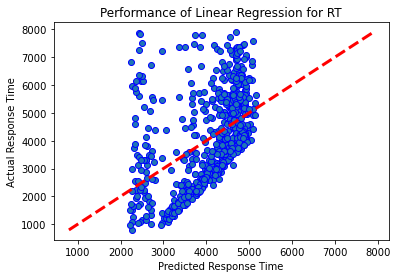

In [409]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted Response Time')
ax.set_ylabel('Actual Response Time')
plt.title('Performance of Linear Regression for RT')
plt.show()

In [410]:
X = df.iloc[:, :3]
y = df.iloc[:, 3]

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#we already have the train and test data
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(random_state = 12, max_iter=2000).fit(X_train, y_train)

print("Training accuracy is ", log_regressor.score(X_train, y_train))
print("Testing accuracy is ", log_regressor.score(X_test, y_test))


y_pred = log_regressor.predict(X_test)

Training accuracy is  0.6059451219512195
Testing accuracy is  0.5707762557077626


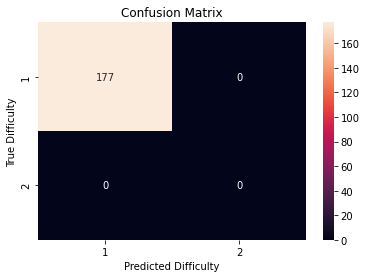

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Difficulty');ax.set_ylabel('True Difficulty'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '2']); ax.yaxis.set_ticklabels(['1', '2']);

In [412]:
X = df.iloc[:, :4]
y = df.iloc[:, 4]

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#we already have the train and test data
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(random_state = 12, max_iter=2000).fit(X_train, y_train)

print("Training accuracy is ", log_regressor.score(X_train, y_train))
print("Testing accuracy is ", log_regressor.score(X_test, y_test))


y_pred = log_regressor.predict(X_test)

Training accuracy is  0.7903963414634146
Testing accuracy is  0.7853881278538812


In [424]:
#first get the pupil responses

pupils_per_trial =[]
pupils_in_time = []
stimulus_onset_time = []


if(1):
    t_pupil_d = pd.read_csv('./Test_Data/TestData_pupil.csv')
    t_behave_d = pd.read_csv('./Test_Data/TestData_behave.csv')
    
    for j in range(len(t_behave_d)-1):
        start_time, end_time = t_behave_d.iloc[j,0], t_behave_d.iloc[j+1,0]
        stimulus_onset_time.append(start_time)
        pupils_per_trial = t_pupil_d.loc[(t_pupil_d['Time'] > start_time) & (t_pupil_d['Time'] < end_time)]
        pupils_per_trial = np.array(pupils_per_trial.iloc[:,1])
        pupils_per_trial = pupils_per_trial.T
        pupils_in_time.append(pupils_per_trial)
pupils_in_time = np.array(pupils_in_time)
print(pupils_in_time.shape)       
            

(39,)


C:\Users\bhand\AppData\Local\Temp\ipykernel_14108\1251932434.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pupils_in_time = np.array(pupils_in_time)


In [425]:
pupils_in_time

array([array([5.23384 , 5.23357 , 5.233169, ..., 4.690072, 4.692838, 4.69556 ]),
       array([4.698236, 4.700865, 4.703445, ..., 4.548895, 4.546517, 4.544093]),
       array([4.541625, 4.539119, 4.53658 , ..., 4.260632, 4.260027, 4.25948 ]),
       array([4.258991, 4.258563, 4.258193, ..., 4.607089, 4.608972, 4.610831]),
       array([4.612659, 4.614446, 4.61618 , ..., 4.509605, 4.511392, 4.513225]),
       array([4.5151  , 4.517012, 4.518959, ..., 4.322854, 4.322939, 4.322937]),
       array([4.322841, 4.322642, 4.322334, ..., 4.542766, 4.545282, 4.547804]),
       array([4.550333, 4.552871, 4.555421, ..., 4.316505, 4.314708, 4.312934]),
       array([4.311186, 4.309467, 4.307782, ..., 4.240249, 4.240954, 4.241655]),
       array([4.242355, 4.243056, 4.243762, ..., 3.920199, 3.920835, 3.921528]),
       array([3.922285, 3.923107, 3.923998, ..., 3.911316, 3.910441, 3.909593]),
       array([3.908777, 3.908   , 3.90727 , ..., 4.146319, 4.146629, 4.146949]),
       array([4.147283, 4.14

In [433]:
columnList = []
c = 4
for i in range(991):
    columnList.append(c)
    c+=4
    
df = pd.DataFrame(data = new_pupil,
                  columns = columnList)

In [434]:
#create a dataframe based on peak latency and value and try to make above predictions
newData = pd.DataFrame(data = df.max(axis=1), columns=['Peak Pupil Response'])
newData['Peak_Latency'] = df.idxmax(axis=1)

In [435]:
newData.head()

,Peak Pupil Response,Peak_Latency
0,5.991895,3636.0
1,5.815964,2852.0
2,5.563529,1552.0
3,5.691393,3180.0
4,5.597188,3880.0


# Predict the Response time based on linear regression model trained in step 3


In [437]:
newData = newData.dropna()

In [438]:
Predicted_onset_Time = regressor.predict(newData)

In [439]:
Predicted_onset_Time

array([4772.04530659, 4269.51247482, 3440.87789751, ..., 3564.05270377,
       5060.42773187, 4726.92550969])

In [440]:
newData['Predicted Onset Time'] = Predicted_onset_Time

C:\Users\bhand\AppData\Local\Temp\ipykernel_14108\3045836119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['Predicted Onset Time'] = Predicted_onset_Time


In [441]:
newData

,Peak Pupil Response,Peak_Latency,Predicted Onset Time
0,5.991895,3636.0,4772.045307
1,5.815964,2852.0,4269.512475
2,5.563529,1552.0,3440.877898
3,5.691393,3180.0,4456.315691
4,5.597188,3880.0,4875.283585
...,...,...,...
2035,6.932581,3952.0,5077.473786
2036,6.994491,3232.0,4642.397170
2037,6.438678,1584.0,3564.052704
2038,6.726127,3964.0,5060.427732


In [443]:
newData.to_excel(r'D:\Comp Psych\Project 2\Predicted_results_step5.xlsx', index=False)